[-2.1718662218528496e+22, 49378667060387.19]
[-2.1715745890458317e+22, 49378667060316.84]
[-2.171574628205561e+22, 49378667060316.83]
[-2.171283034547757e+22, 49378667060246.54]
[-2.17128307370223e+22, 49378667060246.54]
[-2.1622817658099387e+22, 49378667058071.0]
[-2.162281726893516e+22, 49378667058070.98]
[-2.153317774059059e+22, 49378667055895.46]
[-2.1533176963871787e+22, 49378667055895.445]
[-2.144390904908911e+22, 49378667053719.89]
[-2.1443908275588724e+22, 49378667053719.91]
[-2.1063801650597794e+22, 49378667044353.73]
[-2.1063795908108546e+22, 49378667044353.72]
[-2.1162471399986427e+22, 49378667046801.195]
[-2.1162468220993226e+22, 49378667046801.2]
[-2.0884717794237725e+22, 49378667039882.5]
[-2.088472133455292e+22, 49378667039882.51]
[-2.0931474899630335e+22, 49378667041053.62]
[-2.0931477124826748e+22, 49378667041053.63]
[-2.070300739937528e+22, 49378667035305.99]
[-2.070300732791103e+22, 49378667035306.01]
[-2.0477031193420306e+22, 49378667029558.414]
[-2.0477031319802785

<ipython-input-7-d73509c2eae2>:36: RuntimeWarning: invalid value encountered in sqrt
  Ems=(Rms*Rms-2*M*1.99e30*Rms+a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
<ipython-input-7-d73509c2eae2>:25: RuntimeWarning: invalid value encountered in sqrt
  Jms=(np.sqrt(M*1.99e30*Rms)*(Rms*Rms-2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))


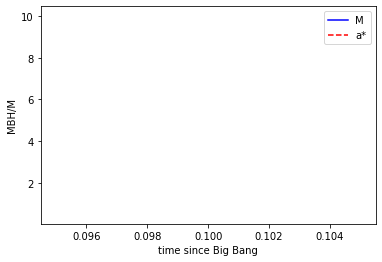

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

def Jms_tilde_nixing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2+np.sqrt((3-z1)*(3+z1+z2*2)))
    Jms=-1*(np.sqrt(M*1.99e30*Rms)*(Rms*Rms+2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms-2*a*np.sqrt(M*1.99e30*Rms)))
    Jms_tilde=Jms/(Rs*c)
    return Jms_tilde
def Jms_tilde_shunxing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Jms=(np.sqrt(M*1.99e30*Rms)*(Rms*Rms-2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
    Jms_tilde=Jms/(Rs*c)
    return Jms_tilde
def Ems_tilde_shunxing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Ems=(Rms*Rms-2*M*1.99e30*Rms+a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
    Ems_tilde=Ems/(c*c)
    return Ems_tilde
def Ems_tilde_nixing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Ems=(Rms*Rms-2*M*1.99e30*Rms-a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms-2*a*np.sqrt(M*1.99e30*Rms)))
    Ems_tilde=Ems/(c*c)
    return Ems_tilde

def M_BH_dot_value(lamda,Ems_tilde,M,fm):
    c=3e8
    M0_dot=lamda*1.3e38*M/(1-Ems_tilde)/c**2
    M_BH_dot=(1+fm)*M0_dot
    return M_BH_dot
def model(z,t):
    lamda=0.5
    fm=2
    astar=z[1]
    M=z[0]
    Ems_tilde=Ems_tilde_shunxing(astar,M)
    Jms_tilde=Jms_tilde_shunxing(astar,M)
    M_BH_dot=M_BH_dot_value(lamda,Ems_tilde,M,fm)
    dMdt=Ems_tilde*M_BH_dot
    dastardt=2*M_BH_dot/(M*1.99e30)*(Jms_tilde-astar*Ems_tilde)
    dzdt=[dMdt,dastardt]
    print(dzdt)
    return dzdt
# initial condition
z0 = [10,0.5]

# time points
t = np.logspace(-1,9,100)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label="M")
plt.plot(t,z[:,1],'r--',label="a*")
plt.ylabel('MBH/M')
plt.xlabel('time since Big Bang')
plt.legend(loc='best')
plt.show()   

<ipython-input-7-504d92932ad2>:35: RuntimeWarning: invalid value encountered in sqrt
  Ems=(Rms*Rms-2*M*1.99e30*Rms+a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
<ipython-input-7-504d92932ad2>:24: RuntimeWarning: invalid value encountered in sqrt
  Jms=(np.sqrt(M*1.99e30*Rms)*(Rms*Rms-2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))


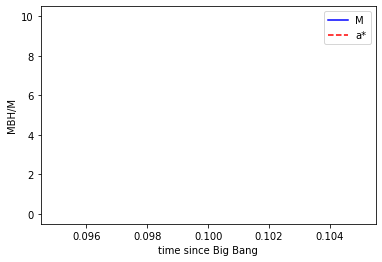

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
def Jms_tilde_nixing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2+np.sqrt((3-z1)*(3+z1+z2*2)))
    Jms=-1*(np.sqrt(M*1.99e30*Rms)*(Rms*Rms+2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms-2*a*np.sqrt(M*1.99e30*Rms)))
    Jms_tilde=Jms/(Rs*c)
    return Jms_tilde
def Jms_tilde_shunxing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Jms=(np.sqrt(M*1.99e30*Rms)*(Rms*Rms-2*a*np.sqrt(M*1.99e30*Rms)))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
    Jms_tilde=Jms/(Rs*c)
    return Jms_tilde
def Ems_tilde_shunxing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Ems=(Rms*Rms-2*M*1.99e30*Rms+a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
    Ems_tilde=Ems/(c*c)
    return Ems_tilde
def Ems_tilde_nixing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Ems=(Rms*Rms-2*M*1.99e30*Rms-a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms-2*a*np.sqrt(M*1.99e30*Rms)))
    Ems_tilde=Ems/(c*c)
    return Ems_tilde

def M_BH_dot_value(lamda,Ems_tilde,M,fm):
    c=3e8
    M0_dot=lamda*1.3e38*M/(1-Ems_tilde)/c**2
    M_BH_dot=(1+fm)*M0_dot
    return M_BH_dot
def model(z,t):
    lamda=0.5
    fm=2
    astar=z[1]
    M=z[0]
    Ems_tilde=Ems_tilde_shunxing(astar,M)
    Jms_tilde=Jms_tilde_shunxing(astar,M)
    M_BH_dot=M_BH_dot_value(lamda,Ems_tilde,M,fm)
    dMdt=Ems_tilde*M_BH_dot
    dastardt=2*M_BH_dot/(M*1.99e30)*(Jms_tilde-astar*Ems_tilde)
    dzdt=[dMdt,dastardt]
    return dzdt
# initial condition
z0 = [10,0]

# time points
t = np.logspace(-1,9,100)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label="M")
plt.plot(t,z[:,1],'r--',label="a*")
plt.ylabel('MBH/M')
plt.xlabel('time since Big Bang')
plt.legend(loc='best')
plt.show()

In [4]:
import math
import numpy as np
def Ems_tilde_shunxing(astar,M):
    z1=1+math.pow(1-astar**2,1.0/3)*(math.pow(1+astar,1.0/3)+math.pow(1-astar,1.0/3))
    z2=np.sqrt(3*astar**2+z1**2)
    c=3e8
    G=6.7e-11
    a=astar*M*1.99e30
    Rs=2*G*M/(c**2)*1.99e30
    Rms=Rs/2*(3+z2-np.sqrt((3-z1)*(3+z1+z2*2)))
    Ems=(Rms*Rms-2*M*1.99e30*Rms+a*np.sqrt(M*1.99e30*Rms))/(Rms*np.sqrt(Rms*Rms-3*M*1.99e30*Rms+2*a*np.sqrt(M*1.99e30*Rms)))
    Ems_tilde=Ems/(c*c)
    return Ems_tilde

Ems_tilde_shunxing(0.1,10)

150.04483345988274